In [1]:
#import dependencies
import pandas as pd, matplotlib.pyplot as plt, numpy as np

#import citypy
from citipy import citipy

#import datetime
from datetime import datetime

#import requests
import requests

#import API key
from config import weather_api_key

In [15]:
#create set of random lat and longs
dps = 1500
lats = np.random.uniform(low=-90.000,high=90.000,size=dps)
lngs = np.random.uniform(low=-180.000,high=180.000,size=dps)
lat_lngs = list(zip(lats,lngs))

In [16]:
#list for holding cities
cities = []
#identify nearest city using citipy
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if it is unique, add to list
    if city not in cities:
        cities.append(city)
        
#print city count to confirm sufficient data set
len(cities)

622

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# create the empty list
city_data = []
# print start of loggings
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities
for i, city in enumerate(cities):
    
    #group cities in sets of 50
    if (i % 50 == 0 and i >=50):
        set_count+=1
        record_count = 1
    
    #create endpoint URL for each city
    city_url = url + "&q=" + city
    
    #log url, record and set number and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count +=1
    
    try:
        #parse json
        city_weather = requests.get(city_url).json()
        #parse out needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #append to the empty city datas list
        city_data.append({"City": city.title(),
                  "Lat": city_lat,
                  "Lng": city_lng,
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})
        
    except:
        print(f"City name {city} not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | shache
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | sentyabrskiy
City name sentyabrskiy not found. Skipping...
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | rio gallegos
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | muisne
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bhadrachalam
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tamiahua
Processing Record 18 of Set 1 | taolanaro
City name taolanaro not found. Skipping...
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 

Processing Record 41 of Set 4 | vaitupu
City name vaitupu not found. Skipping...
Processing Record 42 of Set 4 | broken hill
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | vaini
Processing Record 45 of Set 4 | sakakah
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | barcelos
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | casambalangan
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | port keats
Processing Record 2 of Set 5 | haapiti
Processing Record 3 of Set 5 | waverly
Processing Record 4 of Set 5 | daxian
City name daxian not found. Skipping...
Processing Record 5 of Set 5 | samusu
City name samusu not found. Skipping...
Processing Record 6 of Set 5 | kaeo
Processing Record 7 of Set 5 | paracuru
Processing Record 8 of Set 5 | sharkan
Processing Record 9 of Set 5 | dzerzhinskoye
Processing Record 10 of Set 5 | ucluelet
Processing Record 11 of Set 5 | japura
Processing Record 12 of S

Processing Record 20 of Set 8 | iqaluit
Processing Record 21 of Set 8 | sinkat
City name sinkat not found. Skipping...
Processing Record 22 of Set 8 | irmo
Processing Record 23 of Set 8 | kajaani
Processing Record 24 of Set 8 | wolfenbuttel
Processing Record 25 of Set 8 | kamenskoye
City name kamenskoye not found. Skipping...
Processing Record 26 of Set 8 | sechura
Processing Record 27 of Set 8 | beloha
Processing Record 28 of Set 8 | poso
Processing Record 29 of Set 8 | ushtobe
Processing Record 30 of Set 8 | sabang
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | bossier city
Processing Record 33 of Set 8 | aguimes
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | gbadolite
Processing Record 36 of Set 8 | putina
Processing Record 37 of Set 8 | shubarshi
Processing Record 38 of Set 8 | inhambane
Processing Record 39 of Set 8 | luau
Processing Record 40 of Set 8 | hendek
Processing Record 41 of Set 8 | jiangyou
Processing Record 42 of Set 8 |

Processing Record 7 of Set 12 | moron
Processing Record 8 of Set 12 | bonfim
Processing Record 9 of Set 12 | kosh-agach
Processing Record 10 of Set 12 | mairana
Processing Record 11 of Set 12 | barinas
Processing Record 12 of Set 12 | almaznyy
Processing Record 13 of Set 12 | lodja
Processing Record 14 of Set 12 | sambava
Processing Record 15 of Set 12 | boksitogorsk
Processing Record 16 of Set 12 | mrirt
City name mrirt not found. Skipping...
Processing Record 17 of Set 12 | madimba
Processing Record 18 of Set 12 | kasama
Processing Record 19 of Set 12 | maniitsoq
Processing Record 20 of Set 12 | taoudenni
Processing Record 21 of Set 12 | morristown
Processing Record 22 of Set 12 | seredeyskiy
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | puerto pinasco
City name puerto pinasco not found. Skipping...
Processing Record 25 of Set 12 | taunggyi
Processing Record 26 of Set 12 | one hundred mile house
City name one hundred mile house not found. Skipping...
Proc

In [19]:
len(city_data)

576

In [25]:
#convert the array of dicts to a DataFrame
city_df = pd.DataFrame(city_data)
column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity",
               "Cloudiness","Wind Speed"]
city_df = city_df[column_order]
city_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-02-22 23:36:37,-33.70,-53.46,60.1,86,15,7.02
1,Shache,CN,2020-02-22 23:50:57,38.42,77.24,37.0,39,0,4.99
2,Yellowknife,CA,2020-02-22 23:39:56,62.46,-114.35,3.2,65,75,6.93
3,Saint-Pierre,RE,2020-02-22 23:42:30,-21.34,55.48,75.2,69,85,8.05
4,Rio Gallegos,AR,2020-02-22 23:43:15,-51.62,-69.22,75.2,33,68,19.46


In [26]:
#create output file
output_data_file = "weather_data/cities.csv"
#export to file
city_df.to_csv(output_data_file,index_label="City_ID")

In [34]:
#import time module
import time
today = time.time()

In [37]:
#create scatter plot fo city lat vs max temp
temps = city_df["Max Temp"]
lats = city_df["Lat"]
humid = city_df["Humidity"]
cloud = city_df["Cloudiness"]
wind = city_df["Wind Speed"]

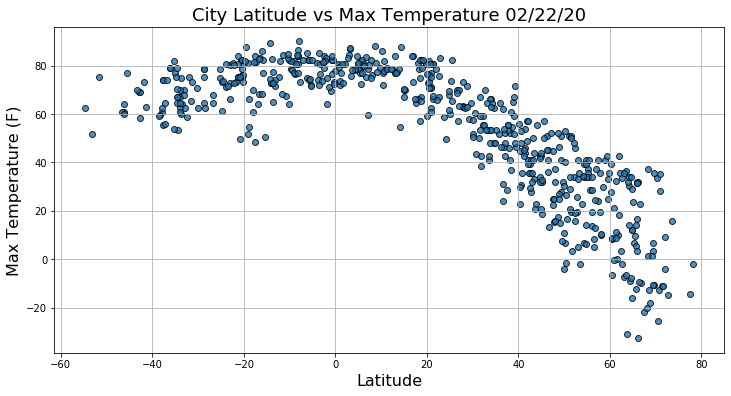

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(lats,temps, edgecolor="black", linewidths=1,
          marker="o", alpha=0.8, label="Cities")
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Max Temperature (F)", fontsize=16)
ax.set_title("City Latitude vs Max Temperature " + time.strftime("%x")
             , fontsize = 18)
ax.grid(True)

fig.savefig("weather_data/Fig1_latvstemp.png")

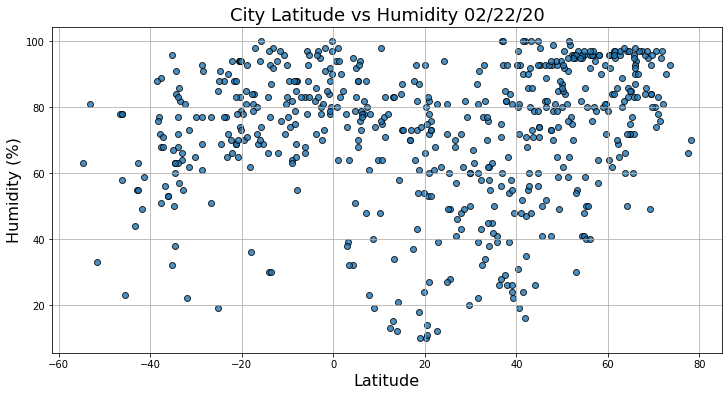

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(lats,humid, edgecolor="black", linewidths=1,
          marker="o", alpha=0.8, label="Cities")
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Humidity (%)", fontsize=16)
ax.set_title("City Latitude vs Humidity " + time.strftime("%x")
             , fontsize = 18)
ax.grid(True)

fig.savefig("weather_data/Fig2_latvshumid.png")

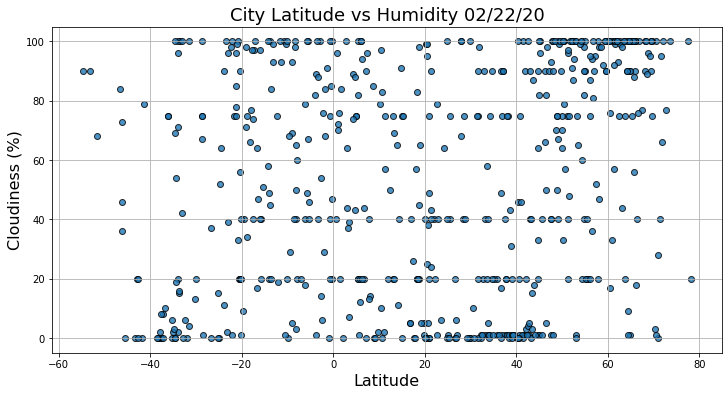

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(lats,cloud, edgecolor="black", linewidths=1,
          marker="o", alpha=0.8, label="Cities")
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Cloudiness (%)", fontsize=16)
ax.set_title("City Latitude vs Humidity " + time.strftime("%x")
             , fontsize = 18)
ax.grid(True)

fig.savefig("weather_data/Fig3_latvscloud.png")

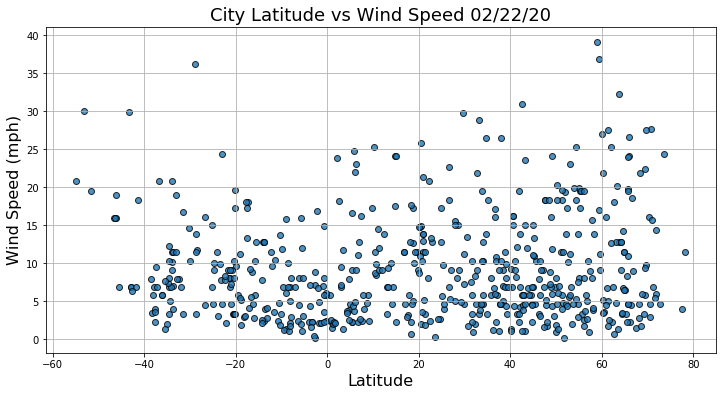

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(lats,wind, edgecolor="black", linewidths=1,
          marker="o", alpha=0.8, label="Cities")
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Wind Speed (mph)", fontsize=16)
ax.set_title("City Latitude vs Wind Speed " + time.strftime("%x")
             , fontsize = 18)
ax.grid(True)

fig.savefig("weather_data/Fig4_latvswind.png")